<a href="https://colab.research.google.com/github/abhijeetraj22/TSF-GRIP_IOT_Tasks/blob/main/TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GRIP The Sparks Foundation(TSF)
**IOT and Computer Vision Internship**

##Task-1 Object Detection / Optical Character Recognition (ORC)

#####In this task, 

- I tried to Implement an object detector which identifies the classes of the objects in an image or video.
- Character detector which extracts printed or handwritten text from an
image or video.

##Steps -
 - Step 1 - Importing the Libraries
 - Step 2 - Visualizing the dataset
 - Step 3 - Data Preprocessing
 - Step 4 - Training the algorithm
 - Step 5 - Visualizing the model
 - Step 6 - Making Predictions
 - Step 7 - Evaluating the model

####Created by - Abhijeet Raj Modanwal


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Object Detection

In [ ]:
!pip3 install --upgrade opencv-python==4.2.34

ERROR: Could not find a version that satisfies the requirement opencv-python==4.2.34 (from versions: 3.4.2.17, 3.4.3.18, 3.4.4.19, 3.4.5.20, 3.4.6.27, 3.4.7.28, 3.4.8.29, 3.4.9.31, 3.4.9.33, 3.4.10.35, 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.14.51, 4.0.0.21, 4.0.1.23, 4.0.1.24, 4.1.0.25, 4.1.1.26, 4.1.2.30, 4.2.0.32, 4.2.0.34, 4.3.0.36, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.2.52)
ERROR: No matching distribution found for opencv-python==4.2.34


### STEP 1 - Importing the Libraries, Config files and Model graphs

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
#importing the required libraries
import cv2 as cv 
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

### STEP 2 - Initializing the Weights file ,config file and names file for Detection

In [ ]:
# Copy the neural network architecture
cfg_file = '/content/drive/MyDrive/Grip/yolov3.cfg'

# Copy the pre-trained weights
weight_file = '/content/drive/MyDrive/Grip/yolov3.weights'

# Copy the names of the classes
namesfile = '/content/drive/MyDrive/Grip/coco.names'

In [ ]:
#loading yolov3 by passing weights and cfg files
net = cv.dnn.readNet(weight_file,cfg_file)
classes=[]
with open(namesfile,"r") as f:
    classes = [line.strip() for line in f.readlines()]


### STEP 3 - Initializing the pre-trained model

In [ ]:
model = cv.dnn_DetectionModel(net)

### STEP 4 - Names of the classes which we are going to predict & Output Layers

In [ ]:
#there are 80 labels that yolov3 can identify
print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
#defining the output layers
print(net.getLayerNames())

['conv_0', 'bn_0', 'relu_0', 'conv_1', 'bn_1', 'relu_1', 'conv_2', 'bn_2', 'relu_2', 'conv_3', 'bn_3', 'relu_3', 'shortcut_4', 'conv_5', 'bn_5', 'relu_5', 'conv_6', 'bn_6', 'relu_6', 'conv_7', 'bn_7', 'relu_7', 'shortcut_8', 'conv_9', 'bn_9', 'relu_9', 'conv_10', 'bn_10', 'relu_10', 'shortcut_11', 'conv_12', 'bn_12', 'relu_12', 'conv_13', 'bn_13', 'relu_13', 'conv_14', 'bn_14', 'relu_14', 'shortcut_15', 'conv_16', 'bn_16', 'relu_16', 'conv_17', 'bn_17', 'relu_17', 'shortcut_18', 'conv_19', 'bn_19', 'relu_19', 'conv_20', 'bn_20', 'relu_20', 'shortcut_21', 'conv_22', 'bn_22', 'relu_22', 'conv_23', 'bn_23', 'relu_23', 'shortcut_24', 'conv_25', 'bn_25', 'relu_25', 'conv_26', 'bn_26', 'relu_26', 'shortcut_27', 'conv_28', 'bn_28', 'relu_28', 'conv_29', 'bn_29', 'relu_29', 'shortcut_30', 'conv_31', 'bn_31', 'relu_31', 'conv_32', 'bn_32', 'relu_32', 'shortcut_33', 'conv_34', 'bn_34', 'relu_34', 'conv_35', 'bn_35', 'relu_35', 'shortcut_36', 'conv_37', 'bn_37', 'relu_37', 'conv_38', 'bn_38', 're

In [ ]:
net.getUnconnectedOutLayers()

array([[200],
       [227],
       [254]], dtype=int32)

In [ ]:
layer_names = net.getLayerNames()

In [ ]:
outputLayers= [layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()]

In [ ]:
outputLayers

['yolo_82', 'yolo_94', 'yolo_106']

In [ ]:
colors = np.random.uniform(0,255,size=(len(classes),3))

### STEP 5 - Loading image & Plotting the image

In [ ]:
img = cv.imread("/content/drive/MyDrive/Grip/Parsons_PR.jpg")
h,w,c= img.shape

shape of image: 


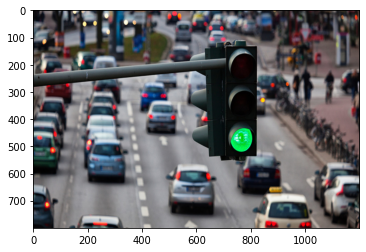

In [ ]:
# displaying the original image
%matplotlib inline
def image_and_shapes(image):
    img= plt.imread(image)
    plt.imshow(img)
    print("shape of image: ".format(img.shape))
image_and_shapes("/content/drive/MyDrive/Grip/Parsons_PR.jpg")

### STEP 6 - Extracting Features ie. Detecting objects

In [ ]:
#extracting features ie. detecting objects

blob = cv.dnn.blobFromImage(img,0.00392,(416,416),(0,0,0),True, crop= False)

In [ ]:
net.setInput(blob)
outs = net.forward(outputLayers)
print(outs[1])

[[0.01989063 0.02711788 0.04331711 ... 0.         0.         0.        ]
 [0.02164415 0.02626262 0.36620048 ... 0.         0.         0.        ]
 [0.02371548 0.02133686 0.07768884 ... 0.         0.         0.        ]
 ...
 [0.9748134  0.9698876  0.04519611 ... 0.         0.         0.        ]
 [0.97805065 0.9744495  0.3107998  ... 0.         0.         0.        ]
 [0.9758672  0.9796181  0.08199454 ... 0.         0.         0.        ]]


In [ ]:
#finding confidence score of algorithm in object detection in blob
class_ids=[]
confidences =[]
boxes =[]
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        
        #object detected
        if confidence > 0.7:
            center_x= int(detection [0] * w)
            center_y= int(detection [1] * h)
            ww = int(detection [2] * w)
            hh = int(detection [3] * h)
            
            #coordinates of a rectangle
            x= int(center_x - ww/2)
            y= int(center_y - hh/2)
            
            boxes.append([x,y,ww,hh])
            confidences.append(float(confidence)) 
            class_ids.append(class_id)

### STEP 7 - Lets run this object detection on an image

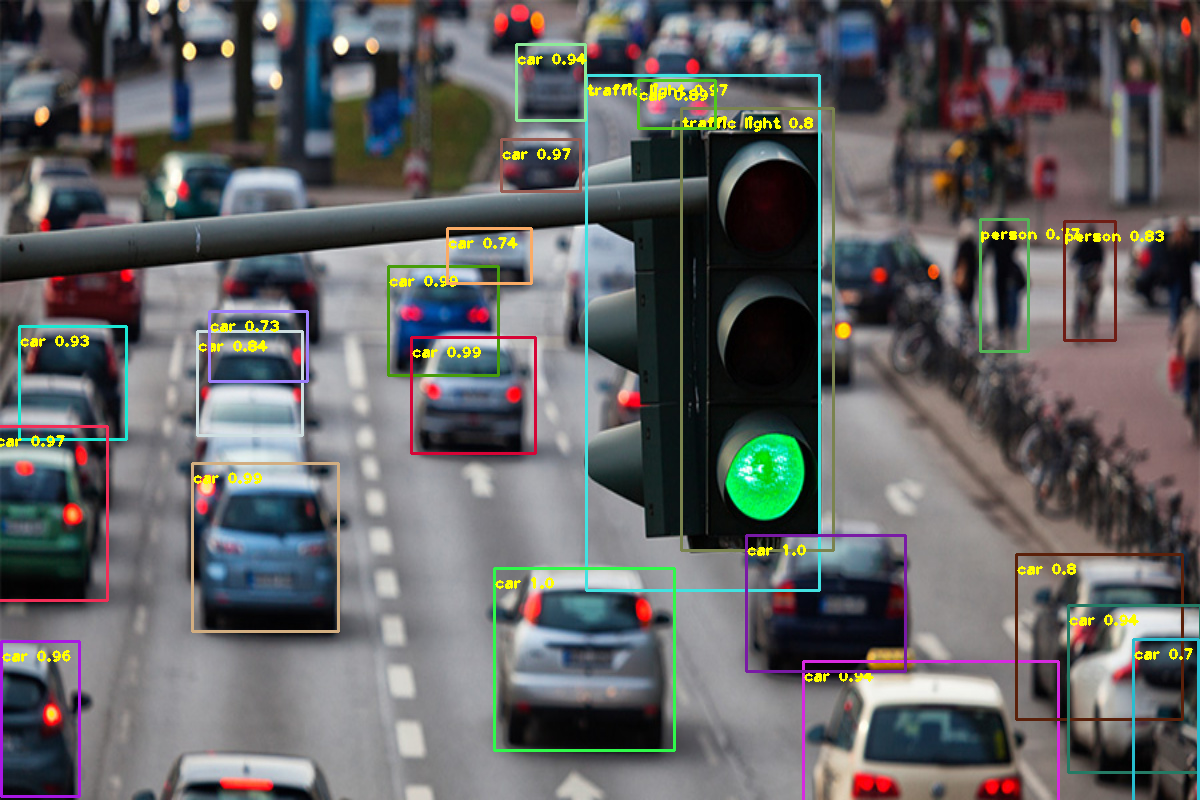

In [ ]:
#to eliminate multiple detections for same object
#using non - max suppression
#anything with IOU_threshold < 0.6 will be removed
indexes = cv.dnn.NMSBoxes(boxes,confidences,0.4,0.6) 

# to loop over all the boxes
font = cv.FONT_HERSHEY_PLAIN
colors= np.random.uniform(0,255,size= (len(boxes),3))
for i in range(len(boxes)):
    if i in indexes:
        x,y,ww,hh = boxes[i]
        label= str(classes[class_ids[i]])
        confi = str(round(confidences[i],2))
        color = colors[i]
        cv.rectangle(img,(x,y),(x+ww,y+hh),color,2)
        cv.putText(img,label+" "+ confi,(x,y+20),font,1,(0,255,255),2)
cv2_imshow(img)
cv.waitKey(0)
cv.destroyAllWindows()

## Optical Character Recognition (OCR)
*Character detector which extracts printed or handwritten text from an image or video. We will use pytesseract to perform this task*

In [ ]:
!pip install tesseract
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 0s (28.6 MB/s)
debconf: unable to initia

In [ ]:
! pip install pillow
! pip install pytesseract

### STEP 1 - Importing the Libraries

In [ ]:
import pytesseract
from pytesseract import Output

### STEP 2 - Loading & Plotting the image

The type of this input is <class 'numpy.ndarray'>
Shape: (1202, 850, 3)


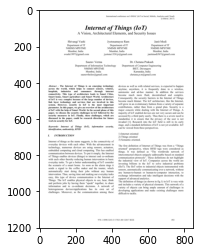

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Grip/largepreview.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

### STEP 3 - Converting BGR image to grayscale.

(-0.5, 849.5, 1201.5, -0.5)

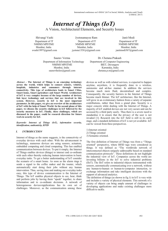

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')
plt.axis('off')

### STEP 4 - Performing OCR

In [ ]:
print(pytesseract.image_to_string(image))

Jntertie omfixencs om SMI (16 in in Ai Sots wi Ci

Internet of Things (I

(-SMac 2007)

 

A Mision, Architectural Blements, and Secunity Issues

 

 

 

Shivangi Mashi Sypisnammyee Ram anid Mo
Dep 60 10 0m
NMINS MEST NSIS WESDUB
‘Murua bin hua India Mumia Iria
sant 8°(0fgmail com ijyetsral 3300 jf@ gram. comm (jeultmediS6772 gre oom
Sauray Viena Dr, Cbetana Brakasb

SDoKimation fizolindlogy — DeparimencaCompunen Engineering

MINS MESDMB
Mumbbiy Indien
sauraviickeal@ gmail.com

Hugecnet OF (Rings (Sam emerging keeHwokegy,

Ni helps tm comest senso) wehfeless
Tuspifaks ladusttiés soil censumcts — thirougli
romucttivity. 61) wucit@etuce Ienils to Siumart ities
Smnact fare; Sma wgricultere ond Seach Work Alcchifestacs
ll FoI IS wery eurwplen Because 1 thé lange mumbien of deniers,
Tink Iayen fecfimafogy ond sccvites that ce involved in
system, Blowerers sccucity im [el (& the most Iraportaat
Panaructec In Ohis papers we git am ovecntes Of the avchitestace
otal svi phe Help of Sesart WWoE

### STEP 5 - Visualizing output
*Get bounding box to visualize which part of image is recognized by pytesseract*

In [ ]:
h, w, d = image.shape
boxes = pytesseract.image_to_boxes(image) 
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 1)

(-0.5, 849.5, 1201.5, -0.5)

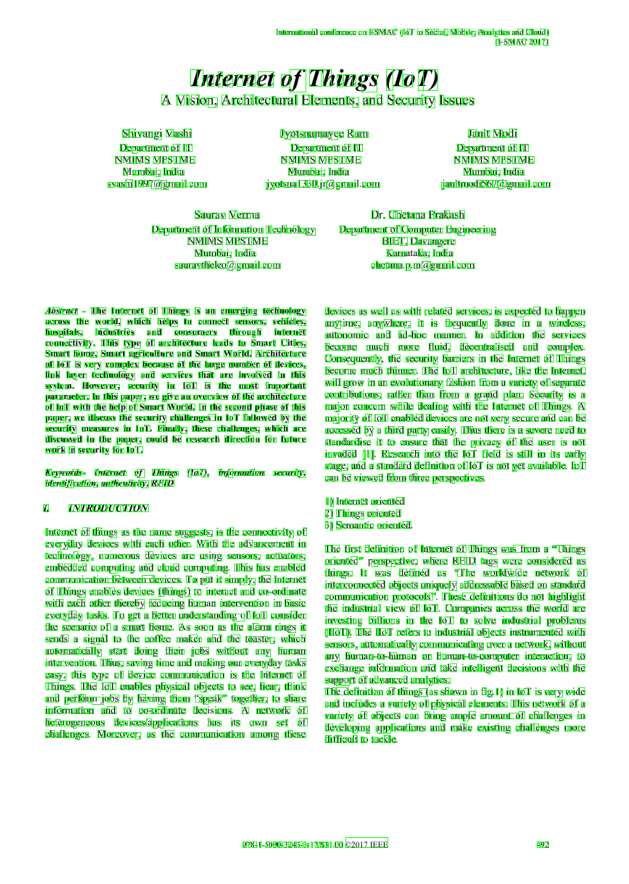

In [ ]:
plt.figure(figsize=(20,16))
plt.imshow(img)
plt.axis('off')

### Conclusion

*Here, we used pytesseract for optical character recognition and visualize the output*

# Thank You